In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
# engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [12]:
#Practice 

session.query(func.max(Measurement.tobs)).all()

[(87.0,)]

In [10]:
# Find the most recent date in the data set.

session.query(Measurement.date).order_by(Measurement.date).first()


('2010-01-01',)

In [11]:
# Calculate the date one year from the last date in data set

session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

In [20]:
# Perform a query to retrieve the data and precipitation scores

query1= session.query(Measurement.date,Measurement.prcp).filter(Measurement.date <= '2017-08-23', Measurement.date >= '2016-08-23').all()

query1

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

<AxesSubplot:xlabel='Date', ylabel='Inches'>

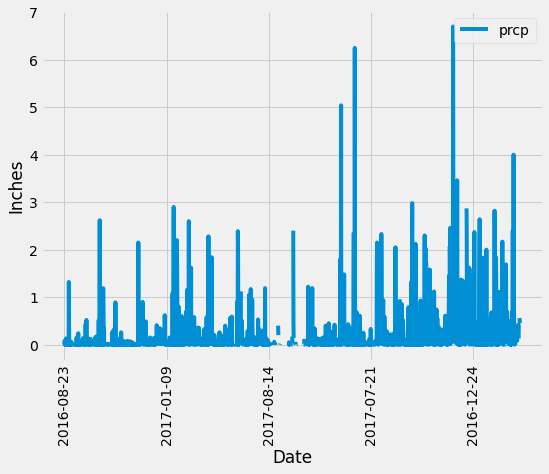

In [35]:

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(query1)
df2 = df.set_index("date")


# Sort the dataframe by date

df2.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data

df2.plot(xlabel="Date", ylabel="Inches",rot=90,figsize=(8,6))


In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df2.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number stations in the dataset

session.query(Station.id).count()


9

In [81]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

query2= session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
query2

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [98]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active = session.query(Measurement.station,Measurement.tobs).filter(Measurement.station=='USC00519281').all()

lowest_temp = session.query(Measurement.station,func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
lowest_temp


[('USC00519281', 54.0)]

In [100]:
highest_temp = session.query(Measurement.station,func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
highest_temp

[('USC00519281', 85.0)]

In [101]:

average_temp = session.query(Measurement.station,func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
average_temp  

[('USC00519281', 71.66378066378067)]

In [103]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


#Find Last Date of station 

session.query(Measurement.date).filter(Measurement.station=='USC00519281').order_by(Measurement.date.desc()).first()


('2017-08-18',)

In [10]:
#Last 12 months of station 

query3= session.query(Measurement.date,Measurement.tobs).filter(Measurement.station=='USC00519281',Measurement.date <= '2017-08-18', Measurement.date >= '2016-08-18').all()

query3df= pd.DataFrame(query3)

query3df


,date,tobs
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0
...,...,...
352,2017-08-14,77.0
353,2017-08-15,77.0
354,2017-08-16,76.0
355,2017-08-17,76.0


<AxesSubplot:ylabel='Frequency'>

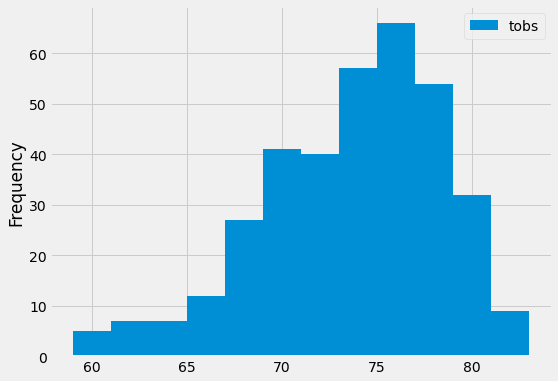

In [11]:
#Histogram


query3df.plot(kind="hist",xlabel="Temperature",figsize=(8,6),bins=12)

# Close session

In [129]:
# Close Session
session.close()